In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


In [2]:
train = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)
sample_submission = pd.read_csv('../input/30-days-of-ml/sample_submission.csv')

In [3]:
train.dtypes.to_frame().transpose()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,object,object,object,object,object,object,object,object,object,object,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [4]:
categorical_features_names_0 = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
train[categorical_features_names_0].nunique().to_frame().transpose()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,2,2,2,4,4,4,8,8,7,15


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


8.191373346601035

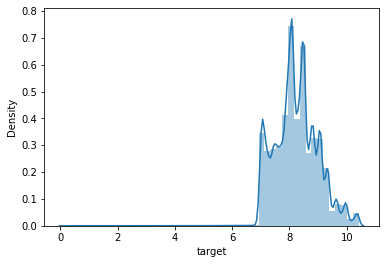

In [5]:
sns.distplot(train['target'])
np.median(train['target'])

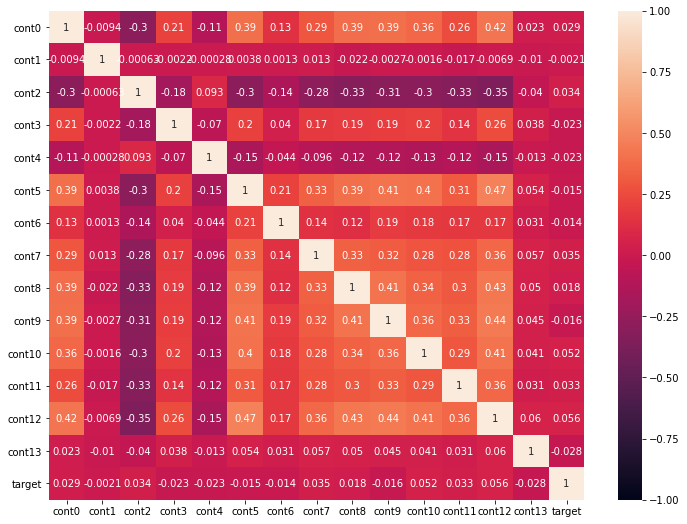

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)

In [7]:
train_change_catf = train.groupby('cat0').size()/len(train)
train.loc[:, 'New_col_0'] = train['cat0'].map(train_change_catf)
train_change_catf = train.groupby('cat1').size()/len(train)
train.loc[:, 'New_col_1'] = train['cat1'].map(train_change_catf)
train_change_catf = train.groupby('cat2').size()/len(train)
train.loc[:, 'New_col_2'] = train['cat2'].map(train_change_catf)
train_change_catf = train.groupby('cat3').size()/len(train)
train.loc[:, 'New_col_3'] = train['cat3'].map(train_change_catf)
train_change_catf = train.groupby('cat4').size()/len(train)
train.loc[:, 'New_col_4'] = train['cat4'].map(train_change_catf)
train_change_catf = train.groupby('cat5').size()/len(train)
train.loc[:, 'New_col_5'] = train['cat5'].map(train_change_catf)
train_change_catf = train.groupby('cat6').size()/len(train)
train.loc[:, 'New_col_6'] = train['cat6'].map(train_change_catf)
train_change_catf = train.groupby('cat7').size()/len(train)
train.loc[:, 'New_col_7'] = train['cat7'].map(train_change_catf)
train_change_catf = train.groupby('cat8').size()/len(train)
train.loc[:, 'New_col_8'] = train['cat8'].map(train_change_catf)
train_change_catf = train.groupby('cat9').size()/len(train)
train.loc[:, 'New_col_9'] = train['cat9'].map(train_change_catf)
train = train.drop(train.columns[:10], axis = 1)
train.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,New_col_0,New_col_1,New_col_2,New_col_3,New_col_4,New_col_5,New_col_6,New_col_7,New_col_8,New_col_9
id,,,,,,,,,,,,,,,,,,,,,
1,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,...,0.356233,0.48392,0.153713,0.877853,0.982457,0.497800,0.96837,0.920133,0.370343,0.055680
2,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,...,0.356233,0.48392,0.846287,0.105753,0.982457,0.420457,0.96837,0.001873,0.255283,0.047343
3,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,...,0.643767,0.51608,0.846287,0.877853,0.982457,0.420457,0.96837,0.040480,0.255283,0.237497
4,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,...,0.356233,0.48392,0.846287,0.877853,0.982457,0.420457,0.96837,0.920133,0.370343,0.060190
6,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,...,0.643767,0.51608,0.846287,0.877853,0.982457,0.420457,0.96837,0.920133,0.255283,0.055680


In [8]:
test_change_catf = test.groupby('cat0').size()/len(test)
test.loc[:, 'New_col_0'] = test['cat0'].map(test_change_catf)
test_change_catf = test.groupby('cat1').size()/len(test)
test.loc[:, 'New_col_1'] = test['cat1'].map(test_change_catf)
test_change_catf = test.groupby('cat2').size()/len(test)
test.loc[:, 'New_col_2'] = test['cat2'].map(test_change_catf)
test_change_catf = test.groupby('cat3').size()/len(test)
test.loc[:, 'New_col_3'] = test['cat3'].map(test_change_catf)
test_change_catf = test.groupby('cat4').size()/len(test)
test.loc[:, 'New_col_4'] = test['cat4'].map(test_change_catf)
test_change_catf = test.groupby('cat5').size()/len(test)
test.loc[:, 'New_col_5'] = test['cat5'].map(test_change_catf)
test_change_catf = test.groupby('cat6').size()/len(test)
test.loc[:, 'New_col_6'] = test['cat6'].map(test_change_catf)
test_change_catf = test.groupby('cat7').size()/len(test)
test.loc[:, 'New_col_7'] = test['cat7'].map(test_change_catf)
test_change_catf = test.groupby('cat8').size()/len(test)
test.loc[:, 'New_col_8'] = test['cat8'].map(test_change_catf)
test_change_catf = test.groupby('cat9').size()/len(test)
test.loc[:, 'New_col_9'] = test['cat9'].map(test_change_catf)
test = test.drop(test.columns[:10], axis = 1)
test.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,New_col_0,New_col_1,New_col_2,New_col_3,New_col_4,New_col_5,New_col_6,New_col_7,New_col_8,New_col_9
id,,,,,,,,,,,,,,,,,,,,,
0,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,...,0.35585,0.48413,0.153115,0.877400,0.982675,0.500875,0.967595,0.91898,0.267630,0.197390
5,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,...,0.64415,0.48413,0.846885,0.877400,0.982675,0.066900,0.967595,0.91898,0.371550,0.068810
15,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,...,0.35585,0.51587,0.846885,0.106585,0.982675,0.500875,0.967595,0.91898,0.016585,0.061745
16,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,...,0.35585,0.48413,0.846885,0.877400,0.982675,0.418205,0.967595,0.91898,0.253605,0.056690
17,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,...,0.35585,0.48413,0.846885,0.877400,0.982675,0.066900,0.967595,0.91898,0.371550,0.234920


In [9]:
trainl = train.drop(train.columns[:14], axis = 1)
trainl.head()

,target,New_col_0,New_col_1,New_col_2,New_col_3,New_col_4,New_col_5,New_col_6,New_col_7,New_col_8,New_col_9
id,,,,,,,,,,,
1,8.113634,0.356233,0.48392,0.153713,0.877853,0.982457,0.497800,0.96837,0.920133,0.370343,0.055680
2,8.481233,0.356233,0.48392,0.846287,0.105753,0.982457,0.420457,0.96837,0.001873,0.255283,0.047343
3,8.364351,0.643767,0.51608,0.846287,0.877853,0.982457,0.420457,0.96837,0.040480,0.255283,0.237497
4,8.049253,0.356233,0.48392,0.846287,0.877853,0.982457,0.420457,0.96837,0.920133,0.370343,0.060190
6,7.972260,0.643767,0.51608,0.846287,0.877853,0.982457,0.420457,0.96837,0.920133,0.255283,0.055680


In [10]:
categorical_features_names_1 = ['New_col_0', 'New_col_1', 'New_col_2', 'New_col_3', 'New_col_4', 'New_col_5', 'New_col_6', 'New_col_7', 'New_col_8', 'New_col_9']
train[categorical_features_names_1].nunique().to_frame().transpose()

,New_col_0,New_col_1,New_col_2,New_col_3,New_col_4,New_col_5,New_col_6,New_col_7,New_col_8,New_col_9
0,2,2,2,4,4,4,8,8,7,15


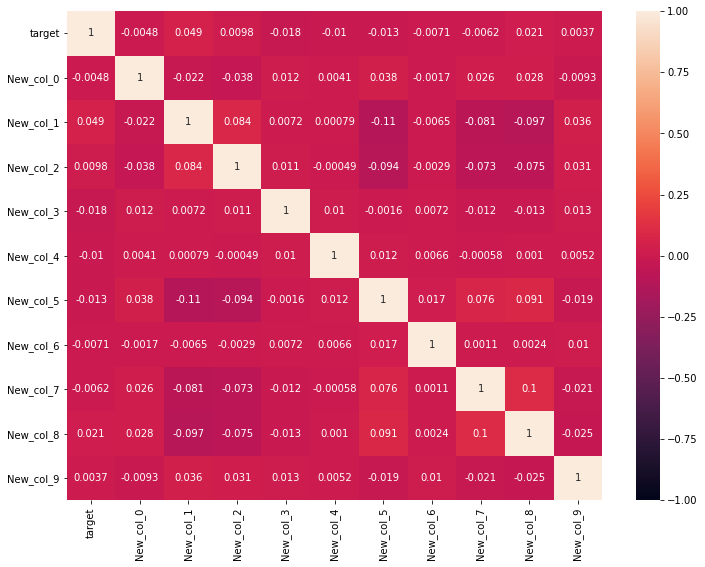

In [11]:
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(trainl.corr(), vmin=-1, vmax=1, annot=True)

In [12]:
y = train.target
features = train.drop(['target'], axis=1)
features.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,New_col_0,New_col_1,New_col_2,New_col_3,New_col_4,New_col_5,New_col_6,New_col_7,New_col_8,New_col_9
id,,,,,,,,,,,,,,,,,,,,,
1,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,...,0.356233,0.48392,0.153713,0.877853,0.982457,0.497800,0.96837,0.920133,0.370343,0.055680
2,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,...,0.356233,0.48392,0.846287,0.105753,0.982457,0.420457,0.96837,0.001873,0.255283,0.047343
3,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,...,0.643767,0.51608,0.846287,0.877853,0.982457,0.420457,0.96837,0.040480,0.255283,0.237497
4,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,...,0.356233,0.48392,0.846287,0.877853,0.982457,0.420457,0.96837,0.920133,0.370343,0.060190
6,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,...,0.643767,0.51608,0.846287,0.877853,0.982457,0.420457,0.96837,0.920133,0.255283,0.055680


In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(features, y, random_state=42, test_size=0.2)

In [14]:
xgb_params = {'objective': 'reg:squarederror',
              'n_estimators': 10000,
              'learning_rate': 0.036,
              'subsample': 0.926,
              'colsample_bytree': 0.118,
              'grow_policy':'lossguide',
              'max_depth': 3,
              'booster': 'gbtree', 
              'reg_lambda': 45.1,
              'reg_alpha': 34.9,
              'random_state': 42,
              'reg_lambda': 0.00087,
              'reg_alpha': 23.132,
              'n_jobs': 4}

best_my_solution = XGBRegressor(**xgb_params)
best_my_solution.fit(X_train, y_train) 
predictions_best_my_solution = best_my_solution.predict(X_valid)
print(mean_squared_error(y_valid, predictions_best_my_solution, squared=False))



0.7156642892752937


In [15]:
pred_1 = best_my_solution.predict(test)

In [16]:
test

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,New_col_0,New_col_1,New_col_2,New_col_3,New_col_4,New_col_5,New_col_6,New_col_7,New_col_8,New_col_9
id,,,,,,,,,,,,,,,,,,,,,
0,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,...,0.35585,0.48413,0.153115,0.877400,0.982675,0.500875,0.967595,0.91898,0.267630,0.197390
5,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,...,0.64415,0.48413,0.846885,0.877400,0.982675,0.066900,0.967595,0.91898,0.371550,0.068810
15,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,...,0.35585,0.51587,0.846885,0.106585,0.982675,0.500875,0.967595,0.91898,0.016585,0.061745
16,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,...,0.35585,0.48413,0.846885,0.877400,0.982675,0.418205,0.967595,0.91898,0.253605,0.056690
17,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,...,0.35585,0.48413,0.846885,0.877400,0.982675,0.066900,0.967595,0.91898,0.371550,0.234920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499987,0.505445,0.710839,0.225285,0.932926,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,...,0.35585,0.51587,0.846885,0.877400,0.982675,0.418205,0.967595,0.91898,0.267630,0.197390
499990,0.350751,0.887132,0.346864,0.284264,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,...,0.35585,0.51587,0.846885,0.877400,0.982675,0.500875,0.967595,0.91898,0.371550,0.234920
499991,0.378393,0.549489,0.411319,0.437275,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,...,0.64415,0.48413,0.153115,0.877400,0.982675,0.500875,0.967595,0.91898,0.371550,0.197390


In [17]:
output = pd.DataFrame({'Id': test.index,'target': pred_1})
output.to_csv('submission.csv', index=False)

In [18]:
sample_submission.head()

,id,target
0,0,0.5
1,5,0.5
2,15,0.5
3,16,0.5
4,17,0.5
